**No warnings**

In [1]:
!pip install shutup

In [2]:
import shutup; shutup.please()

**Kaggle API token for Google Colab**

**The following steps are only for running notebook in Google Colab Environment**

In [3]:
#!pip install kaggle

In [4]:
#!mkdir ~/.kaggle
#!cp /content/kaggle.json ~/.kaggle/kaggle.json
#!chmod 600 /root/.kaggle/kaggle.json

In [5]:
#!unzip *.zip

# Importing Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn import  metrics

%matplotlib inline

**Checking our data**

In [7]:
dataframe = pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv',index_col=[0])
dataframe.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**Descriptive Statistics**

In [8]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


**As we can see the salary ranges from 4000 to 30400000** 

# Data Visualization


**Checking for nulls using Missingno**

The Missingno python library helps to visualise the missing values in a pandas dataframe.

It helps for quick visual summary of the completeness/incompleteness of the dataset


In [9]:
!pip install missingno

In [10]:
import missingno as msno

**Plotting a Bar Chart of the missing values**

<AxesSubplot:>

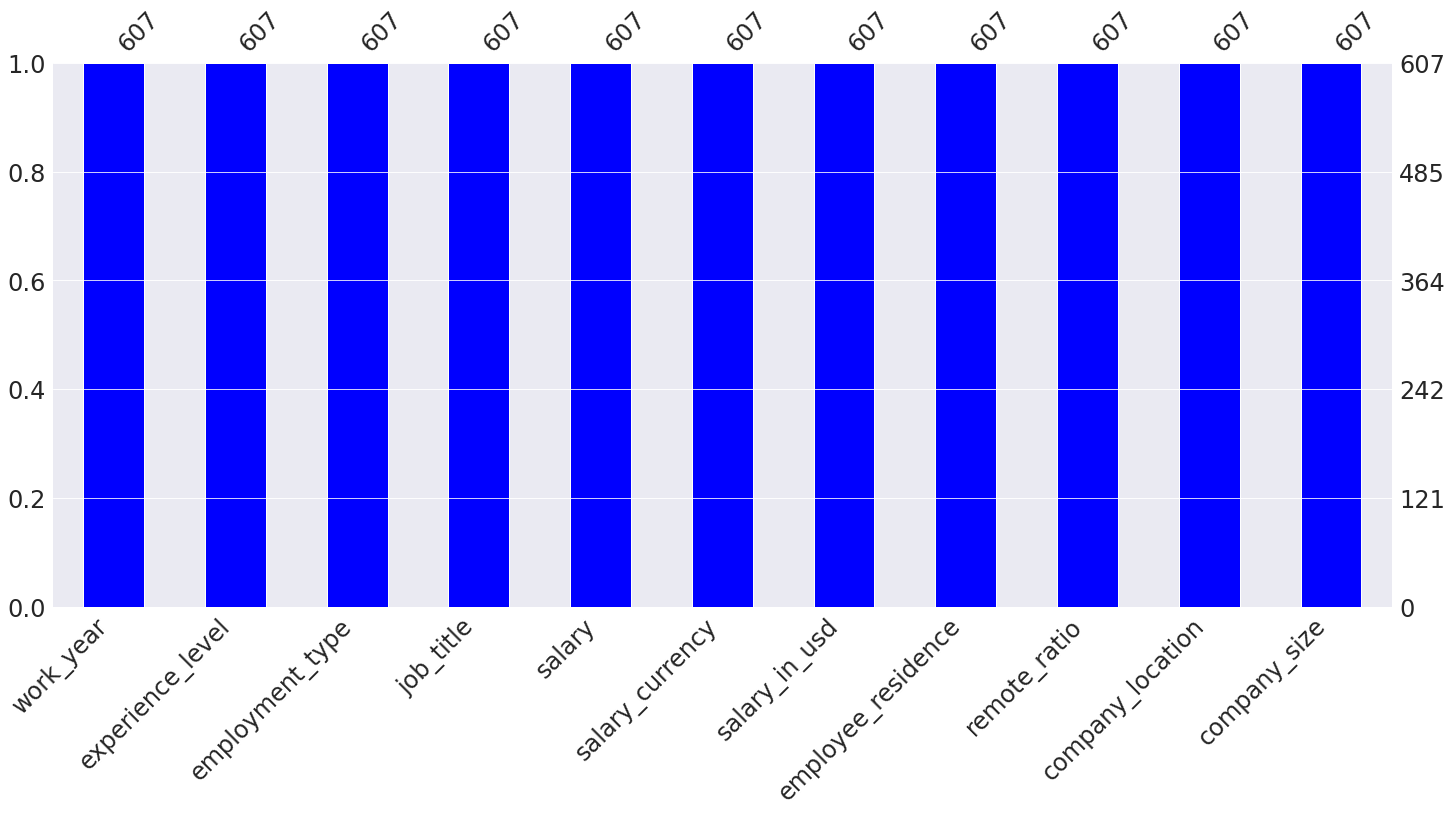

In [11]:
msno.bar(dataframe,fontsize = 24, color = 'blue')

**Heatmap of missing values**

<AxesSubplot:>

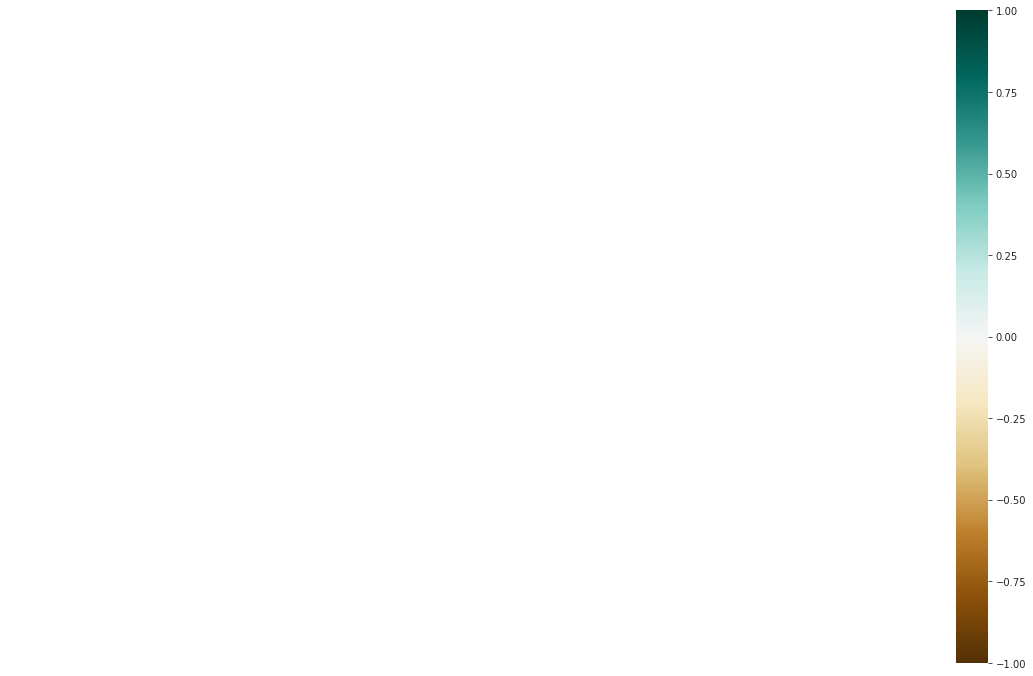

In [12]:
msno.heatmap(dataframe,fontsize = 24, cmap = 'BrBG')

**Hence we conclude that there are no missing values in our dataset**

**Count Plot for Most Frequest Job Title**

<AxesSubplot:xlabel='count', ylabel='job_title'>

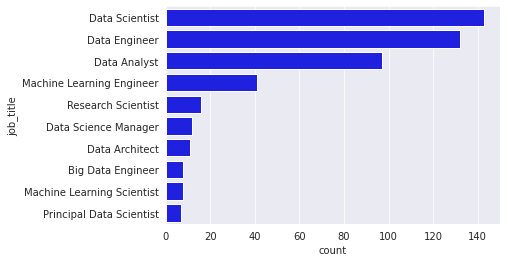

In [13]:
sns.countplot(y = 'job_title',data = dataframe,order = dataframe['job_title'].value_counts().head(10).index, color = 'blue')

**Pie Chart for Job Title**

<AxesSubplot:title={'center':'Job Title Pie Chart'}, ylabel='job_title'>

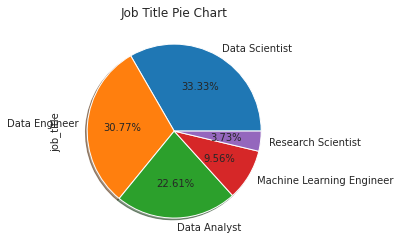

In [14]:
plt.title("Job Title Pie Chart")
dataframe['job_title'].value_counts().head(5).plot(kind="pie",autopct='%.2f%%',
    shadow=True)

**Count Plot for The year the salary was paid**

<AxesSubplot:xlabel='work_year', ylabel='count'>

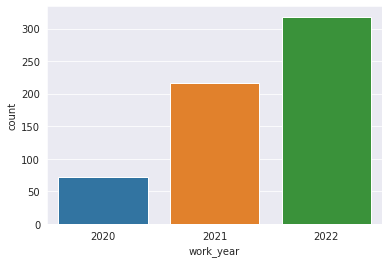

In [15]:
sns.countplot(x = 'work_year',data = dataframe)

**We can see majority data is from the year 2022**

**Distribution of the work done remotely**

<AxesSubplot:xlabel='remote_ratio', ylabel='Density'>

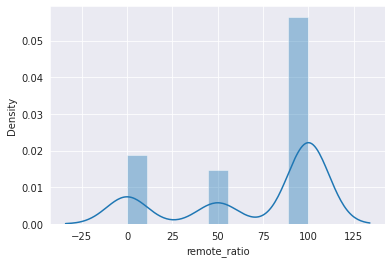

In [16]:
sns.distplot(dataframe['remote_ratio'])

**Correlation Heatmap of Variables**

In [17]:
corr=dataframe.corr()
print(corr)

               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.087577       0.170493      0.076314
salary         -0.087577  1.000000      -0.083906     -0.014608
salary_in_usd   0.170493 -0.083906       1.000000      0.132122
remote_ratio    0.076314 -0.014608       0.132122      1.000000


<AxesSubplot:>

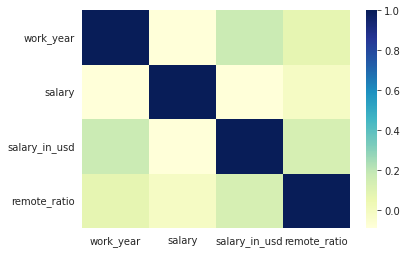

In [18]:
sns.heatmap(corr,cmap = 'YlGnBu')

**Common currency of payment**

<AxesSubplot:xlabel='count', ylabel='salary_currency'>

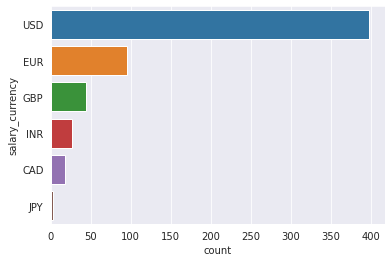

In [19]:
sns.countplot(y=dataframe['salary_currency'],order=dataframe['salary_currency'].value_counts().head(6).index)

<AxesSubplot:title={'center':'Currency of Payment Pie Chart'}, ylabel='salary_currency'>

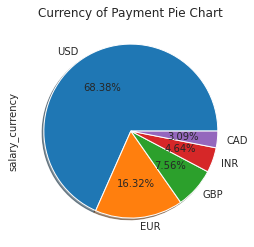

In [20]:
plt.title("Currency of Payment Pie Chart")
dataframe['salary_currency'].value_counts().head(5).plot(kind="pie",autopct='%.2f%%',
    shadow=True,)

**We can see most used currency is US Dollars and least used is Japanese Yen**


**US Dollars salary Distribution**

<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

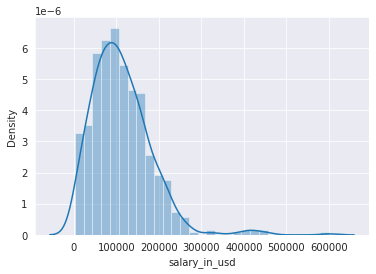

In [21]:
sns.distplot(dataframe['salary_in_usd'])

**Adding a feature for job experience**

In [22]:
job_experience = {
    "EN":0,
    "MI":1,
    "SE":2,
    "EX":3
}
dataframe['experience_level'] = dataframe['experience_level'].map(job_experience)
dataframe

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,1,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,2,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,2,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,1,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,2,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,2,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,2,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,2,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,2,FT,Data Analyst,150000,USD,150000,US,100,US,M


**De-cluttering the Job Designation**

In [23]:
def de_clutter(x):
    if ( x.find("Data Science")>=0  or  x.find("Data Scientist")>=0   ):
        dataframe['job_title'].replace(x,'Data Scientist',inplace = True)
    elif ( x.find("Analyst")>=0  or  x.find("Analytics")>=0 ): 
        dataframe['job_title'].replace(x,'Data Analyst',inplace = True)
    elif ( x.find("ML")>=0  or  x.find("Machine Learning")>=0 ) :
        dataframe['job_title'].replace(x,'Machine Learning Engineer',inplace = True) 
    elif ( x.find("Data Engineer")>=0  or  x.find("Data Engineering")>=0 ):
        dataframe['job_title'].replace(x,'Data Engineer',inplace = True)
    else : 
        dataframe['job_title'].replace(x,'AI related',inplace = True)


In [24]:
for i in dataframe['job_title']:
    de_clutter(i)
    
print(dataframe['job_title'].value_counts())

Data Scientist               192
Data Engineer                158
Data Analyst                 135
Machine Learning Engineer     68
AI related                    54
Name: job_title, dtype: int64


**Company size category**

In [25]:
ordinality = {
    "S":0,
    "M":1,
    "L":2
}

In [26]:
dataframe['company_size'] = dataframe['company_size'].map(ordinality)

In [27]:
dataframe

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,1,FT,Data Scientist,70000,EUR,79833,DE,0,DE,2
1,2020,2,FT,Machine Learning Engineer,260000,USD,260000,JP,0,JP,0
2,2020,2,FT,Data Engineer,85000,GBP,109024,GB,50,GB,1
3,2020,1,FT,Data Analyst,20000,USD,20000,HN,0,HN,0
4,2020,2,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,2
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,2,FT,Data Engineer,154000,USD,154000,US,100,US,1
603,2022,2,FT,Data Engineer,126000,USD,126000,US,100,US,1
604,2022,2,FT,Data Analyst,129000,USD,129000,US,0,US,1
605,2022,2,FT,Data Analyst,150000,USD,150000,US,100,US,1


**Assigning Native Residency**

Making it binary that is within the US or not.

Doing this for both Employee and the Company location.

In [28]:
def residency(x):
    if (x == "US"):
        return "US" 
    else :
        return "Other"

In [29]:
dataframe['employee_residence'] = dataframe['employee_residence'].apply(residency)
dataframe['company_location'] = dataframe['company_location'].apply(residency)

**Converting the salary of USD into Logarithmic Scale**

In [30]:
dataframe['salary_in_usd'] = np.log(dataframe['salary_in_usd']) 
dataframe

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,1,FT,Data Scientist,70000,EUR,11.287692,Other,0,Other,2
1,2020,2,FT,Machine Learning Engineer,260000,USD,12.468437,Other,0,Other,0
2,2020,2,FT,Data Engineer,85000,GBP,11.599323,Other,50,Other,1
3,2020,1,FT,Data Analyst,20000,USD,9.903488,Other,0,Other,0
4,2020,2,FT,Machine Learning Engineer,150000,USD,11.918391,US,50,US,2
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,2,FT,Data Engineer,154000,USD,11.944708,US,100,US,1
603,2022,2,FT,Data Engineer,126000,USD,11.744037,US,100,US,1
604,2022,2,FT,Data Analyst,129000,USD,11.767568,US,0,US,1
605,2022,2,FT,Data Analyst,150000,USD,11.918391,US,100,US,1


**Handling Nominal data**

In [31]:
cats = dataframe.select_dtypes(include="object").columns
dataframe = pd.get_dummies(dataframe,columns=cats,drop_first=True)
dataframe

,work_year,experience_level,salary,salary_in_usd,remote_ratio,company_size,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Analyst,...,salary_currency_HUF,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_TRY,salary_currency_USD,employee_residence_US,company_location_US
0,2020,1,70000,11.287692,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,2,260000,12.468437,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2020,2,85000,11.599323,50,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,1,20000,9.903488,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2020,2,150000,11.918391,50,2,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,2,154000,11.944708,100,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
603,2022,2,126000,11.744037,100,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
604,2022,2,129000,11.767568,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,1
605,2022,2,150000,11.918391,100,1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,1


**Breaking down into X and y**

In [32]:
X=dataframe.drop('salary',axis=1)
y=dataframe['salary']

**Creating Training and Validation sets**

In [33]:
train_X,val_X,train_y,val_y=train_test_split(X,y,test_size=0.2)

In [34]:
print("Shape of Training X :",train_X.shape)
print("Shape of Validation X :",val_X.shape)

Shape of Training X : (485, 30)
Shape of Validation X : (122, 30)


In [35]:
print("Shape of Training y :",train_y.shape)
print("Shape of Validation y :",val_y.shape)

Shape of Training y : (485,)
Shape of Validation y : (122,)


# Model Building

**Approaching the Problem in the same way**

**Going from simple ML Models towards more complex ones**

**Linear Regression**

In [36]:
lr = LinearRegression()
lr.fit(train_X,train_y)
print('Attempting to fit Linear Regressor')

Attempting to fit Linear Regressor


In [37]:
%%time
y_pred_val_lr = lr.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_lr))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_lr))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_lr)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print("\n")

MAE on Validation set : 168811.1883883042


MSE on Validation set : 84851773667.81068


RMSE on Validation set : 410.86638751339126


R2 Score on Validation set : 0.5999388835686652


CPU times: user 19.4 ms, sys: 17.1 ms, total: 36.5 ms
Wall time: 9.78 ms


**Support Vector Regressor**

In [38]:
svm = SVR()
svm.fit(train_X,train_y)
print('Attempting to fit Support Vector Regressor')

Attempting to fit Support Vector Regressor


In [39]:
%%time
y_pred_val_svm = svm.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_svm))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_svm))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_svm)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))
print("\n")

MAE on Validation set : 136497.5273241261


MSE on Validation set : 219264224939.15643


RMSE on Validation set : 369.4557176768633


R2 Score on Validation set : -0.03379206857861217


CPU times: user 29.4 ms, sys: 22.9 ms, total: 52.3 ms
Wall time: 18 ms


**Decision Tree Regressor**

In [40]:
dc = DecisionTreeRegressor(random_state = 0)
dc.fit(train_X,train_y)
print('Attempting to fit Decision Tree Regressor')

Attempting to fit Decision Tree Regressor


In [41]:
%%time
y_pred_val_dc = dc.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_dc))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_dc))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_dc)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))
print("\n")


MAE on Validation set : 19140.713114754097


MSE on Validation set : 7909095212.057377


RMSE on Validation set : 138.34996608150686


R2 Score on Validation set : 0.9627100139015982


CPU times: user 4.82 ms, sys: 736 µs, total: 5.56 ms
Wall time: 5.09 ms


**Random Forest Regressor**

In [42]:
rf = RandomForestRegressor()
rf.fit(train_X,train_y)
print('Attempting to fit Random Forest Regressor')

Attempting to fit Random Forest Regressor


In [43]:
%%time
y_pred_val_rf = rf.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_rf))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_rf))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_rf)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_rf))
print("\n")


MAE on Validation set : 17093.507377049176


MSE on Validation set : 3220284064.034566


RMSE on Validation set : 130.7421407850169


R2 Score on Validation set : 0.9848169297800732


CPU times: user 16.6 ms, sys: 935 µs, total: 17.5 ms
Wall time: 16.7 ms


**MLP Regressor**

In [44]:
mlp = MLPRegressor(max_iter = 300)
mlp.fit(train_X,train_y)
print('Attempting to fit MLP Regressor')

Attempting to fit MLP Regressor


In [45]:
%%time
y_pred_val_mlp = mlp.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_mlp))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_mlp))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_mlp)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_mlp))
print("\n")


MAE on Validation set : 142005.97732417184


MSE on Validation set : 215283542373.6095


RMSE on Validation set : 376.8368046305613


R2 Score on Validation set : -0.01502385381428617


CPU times: user 22.6 ms, sys: 17.2 ms, total: 39.8 ms
Wall time: 10.7 ms


**Gradient Boosting Regressor**

In [46]:
gbc = GradientBoostingRegressor()
gbc.fit(train_X,train_y)
print('Attempting to fit Gradient Boosting Regressor')

Attempting to fit Gradient Boosting Regressor


In [47]:
%%time
y_pred_val_gbc = gbc.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_gbc))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_gbc))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_gbc)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_gbc))
print("\n")


MAE on Validation set : 24249.004737718642


MSE on Validation set : 4855322156.330341


RMSE on Validation set : 155.72091939658796


R2 Score on Validation set : 0.9771080141459413


CPU times: user 6.51 ms, sys: 521 µs, total: 7.03 ms
Wall time: 6.44 ms


**Light GBM Regressor**

In [48]:
lgbm = LGBMRegressor()
lgbm.fit(train_X,train_y)
print('Attempting to fit Light GBM Regressor')

Attempting to fit Light GBM Regressor


In [49]:
%%time
y_pred_val_lgbm = lgbm.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_lgbm))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_lgbm))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_lgbm)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lgbm))
print("\n")


MAE on Validation set : 332981.37781403086


MSE on Validation set : 626478009252.7404


RMSE on Validation set : 577.0453862687326


R2 Score on Validation set : -1.9537330920450753


CPU times: user 25.5 ms, sys: 801 µs, total: 26.3 ms
Wall time: 6.95 ms


In [50]:
print('Logistic Regression R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print('SVR R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))
print('Decision Tree Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))
print('Random Forest Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_rf))
print('MLP Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_mlp))
print('Gradient Boosting R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_gbc))
print('Light GBM R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lgbm))

Logistic Regression R2 Score on Validation set : 0.5999388835686652
SVR R2 Score on Validation set : -0.03379206857861217
Decision Tree Regressor R2 Score on Validation set : 0.9627100139015982
Random Forest Regressor R2 Score on Validation set : 0.9848169297800732
MLP Regressor R2 Score on Validation set : -0.01502385381428617
Gradient Boosting R2 Score on Validation set : 0.9771080141459413
Light GBM R2 Score on Validation set : -1.9537330920450753


**As we can see our top 3 Models(On the basis of R2 score) are -**

1. Random Forest Regressor

2. Gradient Boosting Regressor

3. Decision Tree Regressor

**Future Scope -**

* Create a test set for ruling out if tree based regression models are overfitting.
* Trying Hyperparameter and Model tuning of existing models to achieve better performance.